<h1>Ejercicio 5 - Exercise 5: Regresión Logistica</h1>

Se improtan los códigos de exploración de datos:

In [1]:
include("exploratoryDataAnalysis2.jl")

┌ Warning: Pkg.installed() is deprecated
└ @ Pkg /Users/fau/.julia/juliaup/julia-1.11.2+0.aarch64.apple.darwin14/share/julia/stdlib/v1.11/Pkg/src/Pkg.jl:787


El paquete "CSV" ya está instalado.
El paquete "CSV" se ha cargado exitosamente.
El paquete "DataFrames" ya está instalado.
El paquete "DataFrames" se ha cargado exitosamente.


┌ Warning: Pkg.installed() is deprecated
└ @ Pkg /Users/fau/.julia/juliaup/julia-1.11.2+0.aarch64.apple.darwin14/share/julia/stdlib/v1.11/Pkg/src/Pkg.jl:787


El paquete "Statistics" ya está instalado.
El paquete "Statistics" se ha cargado exitosamente.
El paquete "Random" ya está instalado.
El paquete "Random" se ha cargado exitosamente.
El paquete "GLM" ya está instalado.
El paquete "GLM" se ha cargado exitosamente.


┌ Warning: Pkg.installed() is deprecated
└ @ Pkg /Users/fau/.julia/juliaup/julia-1.11.2+0.aarch64.apple.darwin14/share/julia/stdlib/v1.11/Pkg/src/Pkg.jl:787
┌ Warning: Pkg.installed() is deprecated
└ @ Pkg /Users/fau/.julia/juliaup/julia-1.11.2+0.aarch64.apple.darwin14/share/julia/stdlib/v1.11/Pkg/src/Pkg.jl:787
┌ Warning: Pkg.installed() is deprecated
└ @ Pkg /Users/fau/.julia/juliaup/julia-1.11.2+0.aarch64.apple.darwin14/share/julia/stdlib/v1.11/Pkg/src/Pkg.jl:787


El paquete "CairoMakie" ya está instalado.
El paquete "CairoMakie" se ha cargado exitosamente.


┌ Warning: Pkg.installed() is deprecated
└ @ Pkg /Users/fau/.julia/juliaup/julia-1.11.2+0.aarch64.apple.darwin14/share/julia/stdlib/v1.11/Pkg/src/Pkg.jl:787


run (generic function with 2 methods)

Paquetes usados en el proyecto:
["CSV", "DataFrames", "Statistics", "Random","GLM","CairoMakie","Flux"]

<h2>1.- Importar datos </h2>

In [2]:
ruta="dat/Churn_Modelling.csv"
df=leer_csv_como_dataframe(ruta)
dic_tipos_columnas, nombres_columnas, datatype_columnas=dataType(df)

describe(df)

El archivo "dat/Churn_Modelling.csv" se ha cargado exitosamente.
Se creó el diccionario con el nombre de columna como llave y tipo de dato como valor del dataframe
Se creó el vector con el nombre de columnas del dataframe
Se creó el vector con el tipo de dato de cada columna del dataframe


14×7 DataFrame
 Row │ variable         mean       min       median     max        nmissing  e ⋯
     │ Symbol           Union…     Any       Union…     Any        Int64     D ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ RowNumber        5000.5     1         5000.5     10000             0  I ⋯
   2 │ CustomerId       1.56909e7  15565701  1.56907e7  15815690          0  I
   3 │ Surname                     Abazu                Zuyeva            0  S
   4 │ CreditScore      650.529    350       652.0      850               0  I
   5 │ Geography                   France               Spain             0  S ⋯
   6 │ Gender                      Female               Male              0  S
   7 │ Age              38.9218    18        37.0       92                0  I
   8 │ Tenure           5.0128     0         5.0        10                0  I
   9 │ Balance          76485.9    0.0       97198.5    2.50898e5         0  F ⋯
  10 │ NumOfProducts    1.5302     1         1.0        4                 0  I
  11 │ HasCrCard        0.7055     0         1.0        1                 0  I
  12 │ IsActiveMember   0.5151     0         1.0        1                 0  I
  13 │ EstimatedSalary  1.0009e5   11.58     1.00194e5  1.99992e5         0  F ⋯
  14 │ Exited           0.2037     0         0.0        1                 0  I
                                                                1 column omitted

El dato que debemos predecir es:  
exited, ya que refleja cuantos clientes se fueron (1) y cuantos se quedaron (0)
Esto nos permitiría por ejemplo, crear campañas de retención de ese universo de clientes.



In [3]:
valores_unicos_Exited = unique(df.Exited)

2-element Vector{Int64}:
 1
 0

<h2> 2.- Limpieza de datos </h2>

Los datos que no consideramos con relevancia por ser un ID de la operación es:   
RowNumber  

In [4]:
println("Tamaño de la data Original:")
dataShape(df)
df_filtered=df[:,Not("RowNumber")]

println("Tamaño de la data filtrada:")
dataShape(df_filtered)

Tamaño de la data Original:
Número de filas: 10000
Número de columnas: 14
Tamaño de la data filtrada:
Número de filas: 10000
Número de columnas: 13


(10000, 13)

Transformamos los campos String a variables numéricas / categoricas:

In [5]:
categorias_df=["Geography","Gender","Surname"]

for j in eachindex(categorias_df)
    for i in eachindex(unique(df_filtered[!,categorias_df[j]]))
        replace!(df_filtered[!,categorias_df[j]],unique(df_filtered[!,categorias_df[j]])[i]=>string(i))
    end
df_filtered[!,categorias_df[j]]=parse.(Int,df_filtered[!,categorias_df[j]])
end

describe(df_filtered)

13×7 DataFrame
 Row │ variable         mean           min          median         max         ⋯
     │ Symbol           Float64        Real         Float64        Real        ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ CustomerId           1.56909e7  15565701         1.56907e7  15815690    ⋯
   2 │ Surname            917.856             1       709.0            2932
   3 │ CreditScore        650.529           350       652.0             850
   4 │ Geography            1.7495            1         1.0               3
   5 │ Gender               1.5457            1         2.0               2    ⋯
   6 │ Age                 38.9218           18        37.0              92
   7 │ Tenure               5.0128            0         5.0              10
   8 │ Balance          76485.9               0.0   97198.5               2.50
   9 │ NumOfProducts        1.5302            1         1.0               4    ⋯
  10 │ HasCrCard            0.7055            0         1.0               1
  11 │ IsActiveMember       0.5151            0         1.0               1
  12 │ EstimatedSalary      1.0009e5         11.58      1.00194e5         1.99
  13 │ Exited               0.2037            0         0.0               1    ⋯
                                                               3 columns omitted

Validación de correlaciones

In [6]:
  #----A partir de un threshold determinar columnas con alta correlación:
  threshold=0.90
  relation= >=
  variablesCorrelacionadas, df_correlacion=dfCorrelaciónYDiccionario(df_filtered, threshold, relation)

  # Imprimir cada clave y su valor
for (clave, valor) in variablesCorrelacionadas
  println("Clave: $clave, Valor: $valor")
end

dataShape(df_correlacion)

Clave: CustomerId, Valor: String[]
Clave: Balance, Valor: String[]
Clave: HasCrCard, Valor: String[]
Clave: Geography, Valor: String[]
Clave: Age, Valor: String[]
Clave: Tenure, Valor: String[]
Clave: Exited, Valor: String[]
Clave: IsActiveMember, Valor: String[]
Clave: Gender, Valor: String[]
Clave: NumOfProducts, Valor: String[]
Clave: Surname, Valor: String[]
Clave: EstimatedSalary, Valor: String[]
Clave: CreditScore, Valor: String[]
Número de filas: 10000
Número de columnas: 13


(10000, 13)

Ninguna variable tiene alta correlación.

<h2>3.- Implentación de algoritmos de clasificación  </h2>

<h3>3.1- Definición de la data para pruebas y para entrenamiento </h3>

Definimos un test aleatorio con 60% de los datos para su entrenamiento.

In [7]:
# Generaremos una partición aleatoria de un dataframe
data = df_correlacion

# Establecer un seed para reproducibilidad
Random.seed!(42)

# Definir el porcentaje de datos para el conjunto de entrenamiento (por ejemplo, 80%)
train_percentage = 0.6
n_train = Int64(floor(train_percentage * nrow(data)))  # Número de registros para entrenamiento

# Crear un índice aleatorio para dividir el DataFrame
indices = randperm(nrow(data))

# Dividir los datos en conjuntos de entrenamiento y prueba
train_data = data[indices[1:n_train], :]
test_data = data[indices[n_train+1:end], :]

# Verificar tamaños de los conjuntos
println("Tamaño del conjunto de entrenamiento: ")
dataShape(train_data)
println("Tamaño del conjunto de prueba: ")
dataShape(test_data)

# Separar las variables dependientes e independientes del dataset de entrenamiento
X_train = Matrix(train_data[:, Not(:Exited)])  # Tomamos todas las columnas menos 'Exited' como características
y_train = train_data.Exited  # 'Exited' es la variable objetivo

# Separar las variables dependientes e independientes del dataset de test
X_test = Matrix(test_data[:, Not(:Exited)])  # Tomamos todas las columnas menos 'Exited' como características
y_test = test_data.Exited  # 'Exited' es la variable objetivo

# Separar las variables dependientes e independientes del dataset de entrenamiento
df_X_train = train_data[:, Not(:Exited)]  # DataFrame con todas las columnas menos 'Exited' como características
df_y_train = train_data[:, [:Exited]]  # DataFrame con solo la columna 'Exited' como objetivo

# Separar las variables dependientes e independientes del dataset de prueba
df_X_test = test_data[:, Not(:Exited)]  # DataFrame con todas las columnas menos 'Exited' como características
df_y_test = test_data[:, [:Exited]]  # DataFrame con solo la columna 'Exited' como objetivo


# Verificar tamaños de los conjuntos
println("Tamaño del conjunto X de entrenamiento: ")
dataShape(X_train)
println("Tamaño del conjunto Y de entrenamiento: ")
println(size(y_train))

# Verificar tamaños de los conjuntos
println("Tamaño del conjunto X de test: ")
dataShape(X_test)
println("Tamaño del conjunto Y de test: ")
println((size(y_test)))

Tamaño del conjunto de entrenamiento: 
Número de filas: 6000
Número de columnas: 13
Tamaño del conjunto de prueba: 
Número de filas: 4000
Número de columnas: 13
Tamaño del conjunto X de entrenamiento: 
Número de filas: 6000
Número de columnas: 12
Tamaño del conjunto Y de entrenamiento: 
(6000,)
Tamaño del conjunto X de test: 
Número de filas: 4000
Número de columnas: 12
Tamaño del conjunto Y de test: 
(4000,)


<h3>3.2- Definición algoritmos </h3>

<h4>3.2.1.- Regresión logística: </h4>


In [8]:
fm= @formula(
    Exited ~ 
    CustomerId +
    Surname +
    CreditScore +
    Geography +
    Gender +
    Age +
    Tenure +
    Balance +
    NumOfProducts +
    HasCrCard +
    IsActiveMember +
    EstimatedSalary)

logit= glm(fm,train_data,Binomial(),ProbitLink())

StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Vector{Float64}, Binomial{Float64}, ProbitLink}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Exited ~ 1 + CustomerId + Surname + CreditScore + Geography + Gender + Age + Tenure + Balance + NumOfProducts + HasCrCard + IsActiveMember + EstimatedSalary

Coefficients:
───────────────────────────────────────────────────────────────────────────────────────────
                        Coef.    Std. Error       z  Pr(>|z|)      Lower 95%      Upper 95%
───────────────────────────────────────────────────────────────────────────────────────────
(Intercept)       0.0          NaN           NaN       NaN     NaN            NaN
CustomerId       -1.71605e-7     1.04868e-8  -16.36    <1e-59   -1.92159e-7    -1.51051e-7
Surname          -2.35454e-5     2.61809e-5   -0.90    0.3685   -7.48591e-5     2.77683e-5
CreditScore      -0.000286847    0.00019977   -1.44 

In [9]:
y_prob_logit = GLM.predict(logit,test_data)
size(y_prob_logit)

(4000,)

<h4>3.2.2.- Regresión logística con FLUX: </h4>


Ajustamos nuestros datos y definimos un punto de partida para los ajustes:

In [ ]:
using Flux
#Se definen las clases posibles con flux
classes=[0,1]
#Se transforma X en una matriz que pueda usar flux: 
X_train_flux=Flux.normalise(X_train')
X_test_flux=Flux.normalise(X_test')
#Se transforma y en una variable que pueda usar flux:
y_train_flux=onehotbatch(vec(y_train'),classes)
y_test_flux=onehotbatch(vec(y_test'),classes)
#Se define un punto inicial para ajustar al modelo: modelo=W*X + b = y_predecido
W=rand(Float32,2,12)
b=[0.0f0,0.0f9]
println("El tamaño de X_train_flux es: ",size(X_train_flux))
println("El tamaño de X_test_flux es: ",size(X_test_flux))
println("El tamaño de y_train_flux es: ",size(y_train_flux))
println("El tamaño de y_test_flux es: ",size(y_test_flux))
println("El tamaño de W es: ",size(W))
println("El tamaño de b es: ",size(b))


El tamaño de X_train_flux es: (12, 6000)


Se construye el modelo:

In [79]:
m(W,b,x)=W*x.+b

flux_model=Chain(Dense(12=>2),softmax) #El modelo transformará de 12 caracteristicas a 2 posibles (0 y 1)

function flux_loss(flux_model, features, labels_onehot) #función de perdida para el ajuste
    ŷ = flux_model(features)
    Flux.logitcrossentropy(ŷ, labels_onehot) #logistica
end

function train_flux_model!(f_loss, model, features, labels_onehot) #Definimos el decenso de gradiente para su ajuste
    dLdm, _, _ = gradient(f_loss, model, features, labels_onehot)
    @. model[1].weight = model[1].weight - 0.1 * dLdm[:layers][1][:weight] 
    @. model[1].bias = model[1].bias - 0.1 * dLdm[:layers][1][:bias]
end

train_flux_model! (generic function with 1 method)

Se ajusta con nuestros parametros:

In [110]:
flux_loss(flux_model, X_train_flux, y_train_flux) #Aplicamos nuestros datos de test

for i = 1:2000 #Aplicamos decenso de gradiente 500 veces
    train_flux_model!(flux_loss, flux_model, X_train_flux, y_train_flux);
end

y_probs_flux=flux_model(X_test_flux)[2,:] #obtenemos la probabilidad de que salga 1.
size(y_probs_flux) # graficamos la proba.


(4000,)

<h2>4.- Analisis de precisión y curvas ROC</h2>

<h3>4.1- Funciones para el análisis ROC</h3>

Requiere: 
* Un vector con la predicción de un modelo 
* Las etiquetas reales de un modelo, es decir la matriz de confusión

El accuracy/precisión se calcula con la fórmula:

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$
 
donde:

TP: Verdaderos Positivos (casos positivos correctamente predichos)  
TN: Verdaderos Negativos (casos negativos correctamente predichos)  
FP: Falsos Positivos (casos incorrectamente predichos como positivos)  
FN: Falsos Negativos (casos incorrectamente predichos como negativos)  
 
 Estos datos se calculan por cada umbral para construir el análisis ROC (Receiver Operating Characteristic).

Dicho umbral es el valor que se utiliza para clasificar las predicciones del modelo como positivas o negativas y determina cómo se asignan las etiquetas predichas para cada instancia, basándose en las puntuaciones de probabilidad generadas por el modelo. Para ello se trata como un punto de corte: si la puntuación de una predicción es mayor o igual al umbral, se clasifica como positiva (1), y si es menor, se clasifica como negativa (0).


La curva ROC se construye trazando el tasa de verdaderos positivos (TPR) frente a la tasa de falsos positivos (FPR) para diferentes valores de umbral. 

Funciones:

In [10]:
function AnalisisROCyAUC(predicciones,etiquetas,n_umbral,auc_redondeo=4,loggs=false)
    # Generar diferentes valores de umbral entre 0 y 1
    umbrales = LinRange(0, 1, n_umbral)
    # Inicializar vectores para almacenar TPR y FPR así como la presición
    tprs = Float64[]
    fprs = Float64[]
    accuracy = Float64[]
    # Calcular TPR y FPR para cada umbral
    for umbral in umbrales
        tpr, fpr, accuracyr = calcular_tpr_fpr(predicciones, etiquetas, umbral,loggs)
        push!(tprs, tpr)
        push!(fprs, fpr)
        push!(accuracy,accuracyr)
    end
    # Ordenar FPR y TPR en función de FPR
    orden = sortperm(fprs)  # Índices para ordenar por fprs
    fprs_ordenados = fprs[orden]
    tprs_ordenados = tprs[orden]
    accuracy_ordenados = accuracy[orden]
    umbrales_ordenados = umbrales[orden]
    # Calcular el AUC usando la regla del trapecio / Integración númerica
    auc = round(sum(diff(fprs_ordenados) .* (tprs_ordenados[1:end-1] .+ tprs_ordenados[2:end]) ./ 2),digits=auc_redondeo)
    #println("El Área Bajo la Curva (AUC) es: ", auc)

    return tprs, fprs, accuracy, umbrales, auc, tprs_ordenados, fprs_ordenados, accuracy_ordenados, umbrales_ordenados
end

# Función para calcular TPR y FPR en diferentes umbrales
function calcular_tpr_fpr(predicciones, etiquetas, umbral, loggs=false)
    # Predicciones binarizadas
    predicciones_binarias = predicciones .>= umbral
    # Verdaderos Positivos (TP): predicciones correctas como 1
    tp = sum(predicciones_binarias .== 1 .&& etiquetas .== 1)
    # Falsos Positivos (FP): predicciones incorrectas como 1
    fp = sum(predicciones_binarias .== 1 .&& etiquetas .== 0)
    # Verdaderos Negativos (TN): predicciones correctas como 0
    tn = sum(predicciones_binarias .== 0 .&& etiquetas .== 0)
    # Falsos Negativos (FN): predicciones incorrectas como 0
    fn = sum(predicciones_binarias .== 0 .&& etiquetas .== 1)
    # Calcular TPR y FPR
    tpr = tp / (tp + fn)  # Tasa de verdaderos positivos (recall)
    fpr = fp / (fp + tn)  # Tasa de falsos positivos
    #Calcular la precisión
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    if loggs == true
        println("# Verdaderos Positivos (TP): predicciones correctas como 1: ", tp)
        println("# Falsos Positivos (FP): predicciones incorrectas como 1: ", fp)
        println("# Verdaderos Negativos (TN): predicciones correctas como 0: ", tn)
        println("# Falsos Negativos (FN): predicciones incorrectas como 0: ", fn)
        println("# tasa de verdaderos positivos", tpr)
        println("# Tasa de falsos positivos", fpr)
        println("Precisión: ",accuracy)
    end

    return tpr, fpr, accuracy
end


calcular_tpr_fpr (generic function with 2 methods)

Las aplicamos a nuestros datos:

El auc del modelo logístico con GLM es: 0.7382
El auc del modelo logístico con Flux es: 0.7241


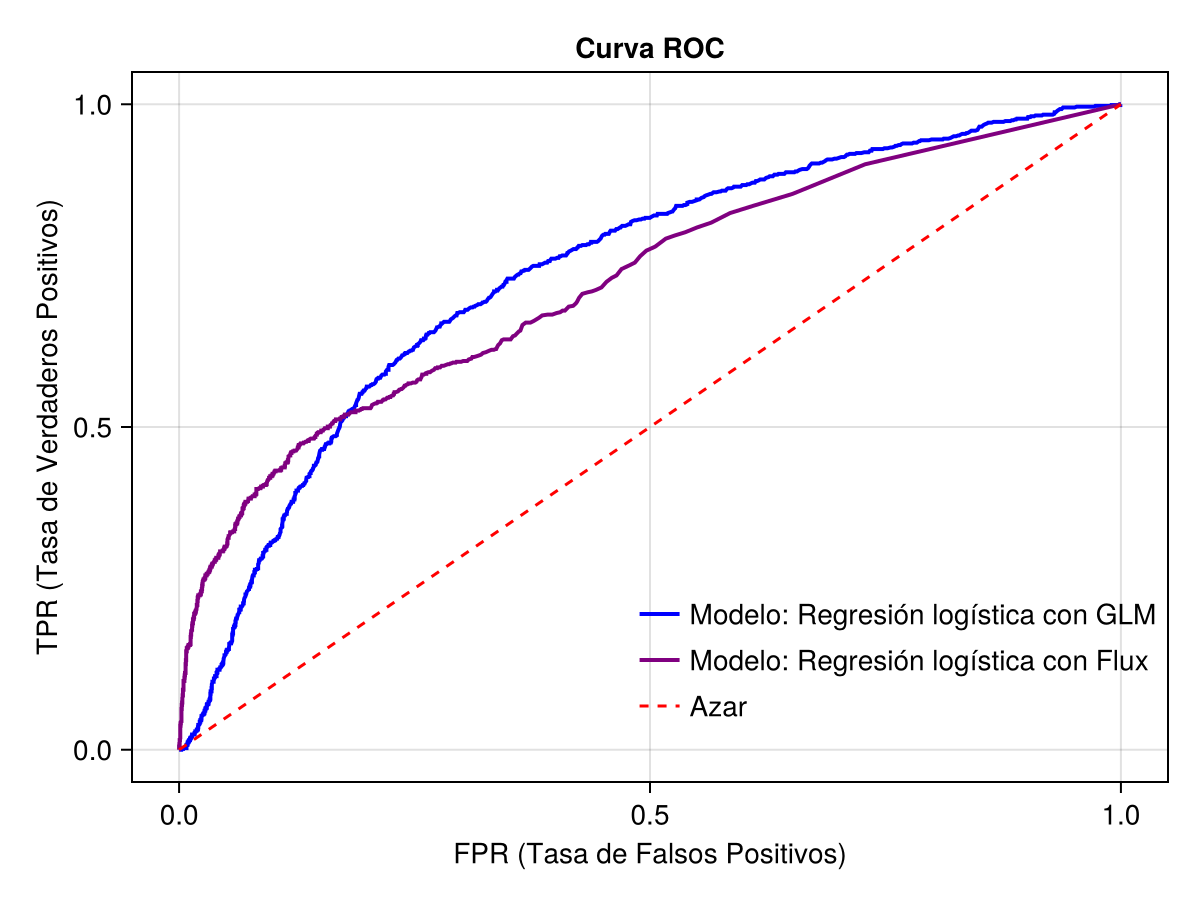

CairoMakie.Screen{IMAGE}


In [115]:
n_umbral=3000
# Simular datos (predicciones y etiquetas reales)
predicciones_logit_flux = y_probs_flux  # Valores de 0 a 1 (predicciones del modelo)
predicciones_logit = y_prob_logit  # Valores de 0 a 1 (predicciones del modelo)
etiquetas_logit = y_test # Etiquetas binarias (0 o 1)

tprs_logit, fprs_logit, accuracy_logit, umbrales_logit, auc_logit, tprs_ordenados_logit, fprs_ordenados_logit, accuracy_ordenados_logit, umbrales_ordenados_logit= AnalisisROCyAUC(predicciones_logit,etiquetas_logit,n_umbral)
tprs_logit_flux, fprs_logit_flux, accuracy_logit_flux, umbrales_logit_flux, auc_logit_flux, tprs_ordenados_logit_flux, fprs_ordenados_logit_flux, accuracy_ordenados_logit_flux, umbrales_ordenados_logit_flux= AnalisisROCyAUC(predicciones_logit_flux,etiquetas_logit,n_umbral)

println("El auc del modelo logístico con GLM es: ", auc_logit)
println("El auc del modelo logístico con Flux es: ", auc_logit_flux)

#version Plots, el paquete tiene problemas
# Graficar la curva ROC
#plot(fprs_logit, tprs_logit, label="Modelo: LASSO ejemplo random", xlabel="FPR (Tasa de Falsos Positivos)", ylabel="TPR (Tasa de Verdaderos Positivos)", title="Curva ROC", linewidth=2, color=:blue)
# Añadir línea diagonal (clasificador aleatorio)
#plot!([0, 1], [0, 1], linestyle=:dash, label="Azar", color=:red)

# Crear la figura
fig = Figure()
# Graficar la curva ROC
ax = Axis(fig[1:8, 1:8], title="Curva ROC", xlabel="FPR (Tasa de Falsos Positivos)", ylabel="TPR (Tasa de Verdaderos Positivos)")
# Graficar la curva ROC
curvaROC=lines!(ax, fprs_logit, tprs_logit, label="Modelo: Regresión logística con GLM", color=:blue, linewidth=2)
curvaROC_flux=lines!(ax, fprs_logit_flux, tprs_logit_flux, label="Modelo: Regresión logística con Flux", color=:purple, linewidth=2)
# Añadir la línea diagonal (clasificador aleatorio)
Azar=lines!(ax, [0, 1], [0, 1], linestyle=:dash, label="Azar", color=:red)

# Mostrar la leyenda en la parte inferior derecha
Legend(fig[7, 8],
    [curvaROC, curvaROC_flux, Azar],
    ["Modelo: Regresión logística con GLM","Modelo: Regresión logística con Flux", "Azar"], framevisible = false)
# Mostrar el gráfico
display(fig)


In [116]:
save("../fig/curvaROC_log.png",fig)

CairoMakie.Screen{IMAGE}


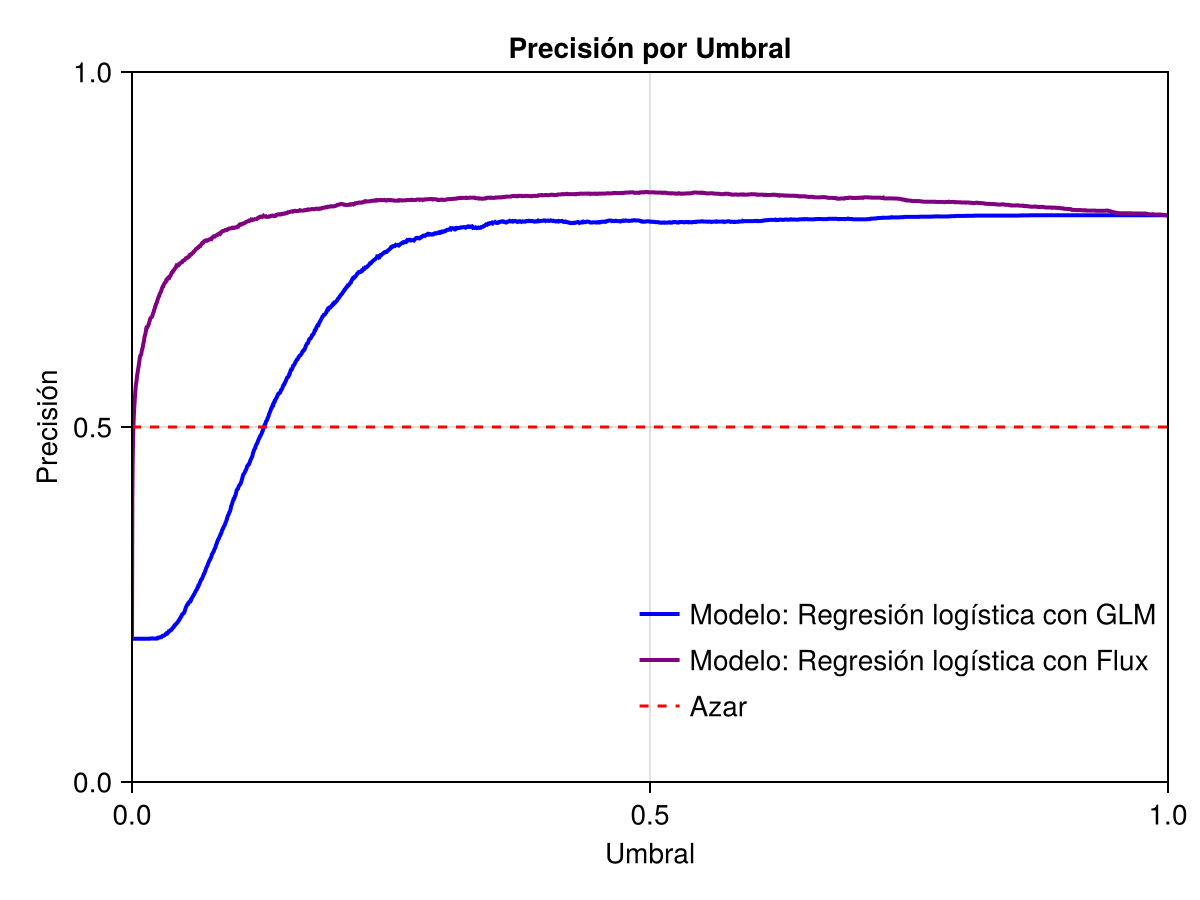

CairoMakie.Screen{IMAGE}


In [117]:
#using CairoMakie

# Crear la figura
fig = Figure()
# Crear el gráfico en el primer eje
ax = Axis(fig[1:8, 1:8], limits = (0, 1, 0, 1),title="Precisión por Umbral", xlabel="Umbral", ylabel="Precisión")
# Graficar la curva
LASSO_logit=lines!(ax, umbrales_logit, accuracy_logit, label="Modelo: logistico GLM", color=:blue, linewidth=2)
Flux_logit=lines!(ax, umbrales_logit_flux, accuracy_logit_flux, label="Modelo: logistico flux", color=:purple, linewidth=2)
Azar_p=lines!(ax, [0, 1], [0.5, .5], linestyle=:dash, label="Azar", color=:red)
#leyendas
Legend(fig[7, 8],
    [LASSO_logit, Flux_logit, Azar_p],
    ["Modelo: Regresión logística con GLM","Modelo: Regresión logística con Flux", "Azar"], framevisible = false)

# Mostrar el gráfico
display(fig)


In [118]:
save("../fig/PrecisionUmbral_log.png",fig)

CairoMakie.Screen{IMAGE}
